In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from state_of_the_art.recommenders.interest_recommender import InterestRecommender


recommender = InterestRecommender(days_to_lookback=30)
 

/opt/miniconda3/envs/python312/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Events config given:  {'arxiv_papers': {'prevent_duplicates_col': 'abstract_url'}}
Found 2698 papers
setting up bm25...
setting up sentence transformers...


In [5]:
interest = 'social good'
interest = ' this dones not make any sense the recall should  be very small'
interest = 'collaboration teams in a tech organization machine learning'
interest = 'arnold khoromov networks'
interest = 'green energy'
interest = 'advanced neural networks'

In [6]:

recommender.recommend(interest, return_papers=True)

[Machine Learning: a Lecture Note: http://arxiv.org/abs/2505.03861,
 Compositional Active Learning of Synchronous Systems through Automated Alphabet Refinement: http://arxiv.org/abs/2504.16624,
 AlphaGrad: Non-Linear Gradient Normalization Optimizer: http://arxiv.org/abs/2504.16020,
 Recovering the CMB signal with neural networks: http://arxiv.org/abs/2504.11869,
 STNet: Prediction of Underwater Sound Speed Profiles with An Advanced Semi-Transformer Neural Networ: http://arxiv.org/abs/2504.17912,
 I-Con: A Unifying Framework for Representation Learning: http://arxiv.org/abs/2504.16929,
 Softpick: No Attention Sink, No Massive Activations with Rectified Softmax: http://arxiv.org/abs/2504.20966]

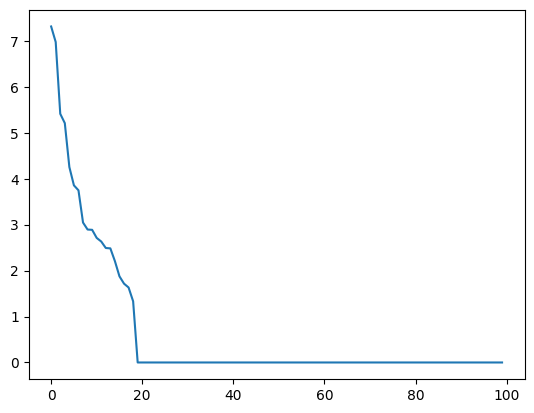

In [ ]:
result = recommender.recommend_via_bm25(interest, return_all_papers=True)
y = [entry[1] for entry in result]

from matplotlib import pyplot as plt
plt.plot(y)
plt.show()

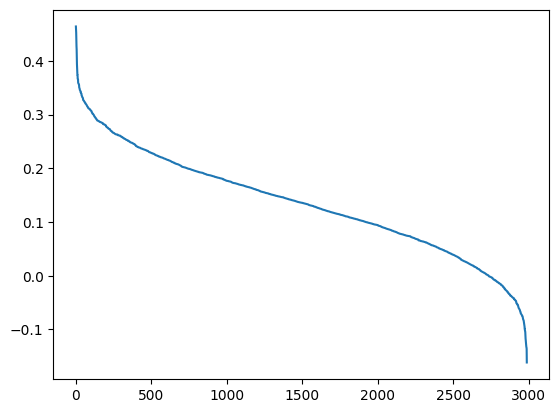

,similarity_score,title,abstract_url
1714,0.463964,iTFKAN: Interpretable Time Series Forecasting with Kolmogorov-Arnold Network,http://arxiv.org/abs/2504.16432
2644,0.457504,Trajectory Encoding Temporal Graph Networks,http://arxiv.org/abs/2504.11386
1503,0.452248,Approximating Optimal Labelings for Temporal Connectivity,http://arxiv.org/abs/2504.16837
2521,0.432644,Training and synchronizing oscillator networks with Equilibrium Propagation,http://arxiv.org/abs/2504.11884
945,0.427325,Equivariant non-linear maps for neural networks on homogeneous spaces,http://arxiv.org/abs/2504.20974
...,...,...,...
1179,-0.130730,Laser-induced modulation of the ferromagnetic-antiferromagnetic phase fraction in FeRh films,http://arxiv.org/abs/2504.20502
2427,-0.132752,Magnetic Pair Distribution Function and Half Polarized Neutron Powder Diffraction at the HB-2A Powder Diffractometer,http://arxiv.org/abs/2504.12107
877,-0.133612,Optimizing carrier balance in CsPbBr3 nanocrystal LEDs: The role of alkyl ligands and polar electron transport layers,http://arxiv.org/abs/2504.21557
393,-0.136464,Competitive Adsorption in Polymer Nanocomposites: The Molecular Weight and End-Group Effect Revealed by SANS and MD Simulations,http://arxiv.org/abs/2505.03312


In [104]:
result = recommender.recommend_via_embeddings(interest)

from matplotlib import pyplot as plt
plt.plot(result['similarity_score'].to_list())
plt.show()

result

In [105]:
import pandas as pd
result =  result[result['similarity_score']>=0.4]
result

,similarity_score,title,abstract_url
1714,0.463964,iTFKAN: Interpretable Time Series Forecasting with Kolmogorov-Arnold Network,http://arxiv.org/abs/2504.16432
2644,0.457504,Trajectory Encoding Temporal Graph Networks,http://arxiv.org/abs/2504.11386
1503,0.452248,Approximating Optimal Labelings for Temporal Connectivity,http://arxiv.org/abs/2504.16837
2521,0.432644,Training and synchronizing oscillator networks with Equilibrium Propagation,http://arxiv.org/abs/2504.11884
945,0.427325,Equivariant non-linear maps for neural networks on homogeneous spaces,http://arxiv.org/abs/2504.20974
2588,0.421356,The Pontryagin Maximum Principle for Training Convolutional Neural Networks,http://arxiv.org/abs/2504.11647
1440,0.405904,I-Con: A Unifying Framework for Representation Learning,http://arxiv.org/abs/2504.16929


In [109]:

paper = 'http://arxiv.org/abs/2504.16432'

#InterestEvaluation().not_relevant(interest, paper)
InterestEvaluation().relevant(interest, paper)

In [8]:
from state_of_the_art.tables.interest_evaluation import InterestEvaluation

df = InterestEvaluation().read(recent_first=True)
print(len(df))
df

6


,query,paper_id,evalution,tdw_timestamp,tdw_uuid
0,arnold khoromov networks,http://arxiv.org/abs/2504.16432,relevant,2025-05-10 20:14:02.590478,ce82bb3d-967e-41ef-8a23-4db764fb25f8
0,arnold khoromov networks,http://arxiv.org/abs/2504.11386,not_relevant,2025-05-10 20:12:37.026326,c9601f53-1569-413f-b220-8b29cdc167a6
0,advanced neural networks,http://arxiv.org/abs/2504.05743,not_relevant,2025-05-10 19:28:47.180398,a79f4f16-db7e-4aff-9283-79a94cc5a746
3,green energy,http://arxiv.org/abs/2504.12245,not_relevant,2025-05-10 19:22:28.053212,ddc027bd-f3f4-4562-a1b8-6313673eb6c5
1,green energy,http://arxiv.org/abs/2504.06834,relevant,2025-05-10 19:21:27.225386,316985a7-8ed1-45e3-9577-99b54cdbf6c8
0,green energy,http://arxiv.org/abs/2505.02846,not_relevant,2025-05-10 19:20:45.831966,1bffd2f9-a77f-43c0-9a69-1c635ba71131


In [6]:
# replace https with http
df['paper_id'] = df['paper_id'].str.replace('https', 'http')
df


,query,paper_id,evalution,tdw_timestamp,tdw_uuid
0,arnold khoromov networks,http://arxiv.org/abs/2504.16432,relevant,2025-05-10 20:14:02.590478,ce82bb3d-967e-41ef-8a23-4db764fb25f8
0,arnold khoromov networks,http://arxiv.org/abs/2504.11386,not_relevant,2025-05-10 20:12:37.026326,c9601f53-1569-413f-b220-8b29cdc167a6
0,advanced neural networks,http://arxiv.org/abs/2504.05743,not_relevant,2025-05-10 19:28:47.180398,a79f4f16-db7e-4aff-9283-79a94cc5a746
3,green energy,http://arxiv.org/abs/2504.12245,not_relevant,2025-05-10 19:22:28.053212,ddc027bd-f3f4-4562-a1b8-6313673eb6c5
1,green energy,http://arxiv.org/abs/2504.06834,relevant,2025-05-10 19:21:27.225386,316985a7-8ed1-45e3-9577-99b54cdbf6c8
0,green energy,http://arxiv.org/abs/2505.02846,not_relevant,2025-05-10 19:20:45.831966,1bffd2f9-a77f-43c0-9a69-1c635ba71131


In [7]:
InterestEvaluation().replace(df, dry_run=False)

In [10]:
InterestEvaluation().delete_by('tdw_uuid', '16449e88-0082-4feb-b338-fd2aa394e1cf')

Replace of event interest_evaluation, destructive event! Disable dry run to execute it


True